In [3]:
from sklearn import cluster
import matplotlib.pyplot as plt 
%matplotlib inline 

In [ ]:
# 도미와 빙어의 무게와 길이 데이터 확인 

In [7]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

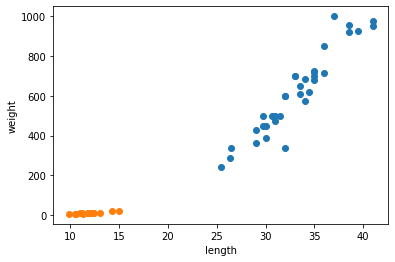

In [10]:
plt.scatter(bream_length, bream_weight) 
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [11]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [13]:
# sklearn을 사용하기 위한 이차원 리스트의 데이터로 변환하기
# zip 메서드는나열된 리스트에서 원소를 하나씩 꺼내주는 일을 함 
fish_data = [[l,w] for l,w in zip(length, weight)]

In [16]:
# 도미와 빙어 정답 데이터 만들기 (도미 = 1, 빙어 = 0) 
fish_target = [1] * 35 + [0] * 14

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# kneighborsClassfier 클래스의 객체를 만들고 여기에 도미를 찾기 위한 기준을 학습 시킴 (훈련)
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [19]:
# 모델이 얼마나 잘 훈련되었는지 평가하기 (정확도)
# 참고로 머신러닝 프로그램에서는 알고리즘이 구현된 객체를 모델이라고 부름. 
# 정확도는 정확한 답을 몇개 맞혔는지를 백분율로 나타낸 값. 사이킷런에서는 0 ~ 1사이의 값으로 나타냄    
kn.score(fish_data, fish_target)

1.0

In [20]:
# predict()는 새로운 데이터의 정답을 예측
kn.predict([[30, 600]])

array([1])

In [21]:
# k- 최근접 이웃 알고리즘은 어떤 데이터에 대한 답을 구할때 주위의 다른 데이터를 보고 다수를 차지하는 것을 정답으로 사용한다. 
# 마치 근묵자흑과 같이 주위의 데이터로 현재 데이터를 판단하는것.
# 새로운 데이터에 대해 예측할때는 가장 가까운 직선거리에 어떤 데이터가 있는지 살피기만 하면 된다.
# 단점은 이런 특징때문에 k-최근접 이웃 알고리즘은 데이터가 아주 많은 경우 사용하기 어렵다. 
# 데이터가 크기 때문에 메모리가 많이 필요하고 직선거리를 계산하는데도 많은 시간이 필요하기 때문. 

# 실제로 k-최근접 이웃 알고리즘은 무언가 훈련되는게 없는 셈이다. fit() 메서드에 전달한 데이터를 모두 저장하고 있다가, 
# 새로운 데이터가 등장하면 가장 가까운 데이터를 참고하여 구분해내는 것.

In [23]:
# 참고하는 근접 데이터의 개수의 기본값은 5이다. n_neighbors 매개변수로 변경할 수 있음

kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [24]:
for n in range(5, 50):
    # k-최근접 이웃 개수 설정
    kn.n_neighbors = n
    # 점수 계산
    score = kn.score(fish_data, fish_target)
    if score < 1 :
        print (n, score)
        break

18 0.9795918367346939
